In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/IMDb_All_Genres_etf_clean1.csv')
df.head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


In [5]:
df.describe()

,Year,Rating,Runtime(Mins)
count,5562.000000,5562.000000,5562.000000
mean,2002.792521,6.755861,112.226717
std,16.143990,0.937133,21.612655
min,1920.000000,1.000000,45.000000
25%,1997.000000,6.200000,97.000000
50%,2007.000000,6.800000,108.000000
75%,2014.000000,7.400000,123.000000
max,2022.000000,9.300000,321.000000


In [6]:
director_avg_rating = df.groupby('Director')['Rating'].mean().sort_values(ascending=False)
print("Directors with the highest average rating:")
display(director_avg_rating.head())

Directors with the highest average rating:


,Rating
Director,
Rishab Shetty,9.3
Ertem Egilmez,9.2
Amitabh Reza Chowdhury,9.0
Kiranraj K,8.9
T.J. Gnanavel,8.9


In [7]:
# Since the 'Actors' column contains multiple actors, we need to split them and then group by each actor
actors_df = df.assign(Actors=df['Actors'].str.split(', ')).explode('Actors')
actor_avg_rating = actors_df.groupby('Actors')['Rating'].mean().sort_values(ascending=False)
print("\nActors with the highest average rating:")
display(actor_avg_rating.head())


Actors with the highest average rating:


,Rating
Actors,
Rishab Shetty,9.3
Bob Gunton,9.3
Sapthami Gowda,9.3
Kishore Kumar G.,9.3
Münir Özkul,9.2


In [8]:
df['Total_Gross'] = df['Total_Gross'].str.replace('$', '').str.replace('M', '')
df['Total_Gross'] = pd.to_numeric(df['Total_Gross'], errors='coerce')
df.head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,NaN,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,534.86,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,377.85,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,292.58,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,342.55,Action,"Adventure, Drama"


In [9]:
print("Number of missing values in Total_Gross before dropping:", df['Total_Gross'].isnull().sum())
df.dropna(subset=['Total_Gross'], inplace=True)
print("Number of missing values in Total_Gross after dropping:", df['Total_Gross'].isnull().sum())

Number of missing values in Total_Gross before dropping: 861
Number of missing values in Total_Gross after dropping: 0


In [10]:
df_sorted_gross = df.sort_values(by='Total_Gross', ascending=False)
display(df_sorted_gross.head())

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
130,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",7.8,138,U,936.66,Action,"Adventure, Sci-Fi"
19,Avengers: Endgame,2019,"Directors:Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",8.4,181,UA,858.37,Action,"Adventure, Drama"
31,Spider-Man: No Way Home,2021,Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...",8.3,148,UA,804.75,Action,"Adventure, Fantasy"
142,Avatar,2009,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,162,UA,760.51,Action,"Adventure, Fantasy"
317,Black Panther,2018,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",7.3,134,UA,700.06,Action,"Adventure, Sci-Fi"


In [14]:
print("Directors of the highest-grossing movies:")
display(df_sorted_gross[['Director','Total_Gross']].head())

Directors of the highest-grossing movies:


,Director,Total_Gross
130,J.J. Abrams,936.66
19,"Directors:Anthony Russo, Joe Russo",858.37
31,Jon Watts,804.75
142,James Cameron,760.51
317,Ryan Coogler,700.06


In [12]:
highest_grossing_movies_directors = df_sorted_gross[['Movie_Title', 'Director']]
display(highest_grossing_movies_directors.head())

,Movie_Title,Director
130,Star Wars: Episode VII - The Force Awakens,J.J. Abrams
19,Avengers: Endgame,"Directors:Anthony Russo, Joe Russo"
31,Spider-Man: No Way Home,Jon Watts
142,Avatar,James Cameron
317,Black Panther,Ryan Coogler


# Task
Analyze the relationship between `Rating`, `Runtime(Mins)`, and `Total_Gross` by calculating and visualizing the correlation matrix.

In [15]:
selected_columns = df[['Rating', 'Runtime(Mins)', 'Total_Gross']]
correlation_matrix = selected_columns.corr()
display(correlation_matrix)

,Rating,Runtime(Mins),Total_Gross
Rating,1.000000,0.359824,0.072616
Runtime(Mins),0.359824,1.000000,0.157892
Total_Gross,0.072616,0.157892,1.000000


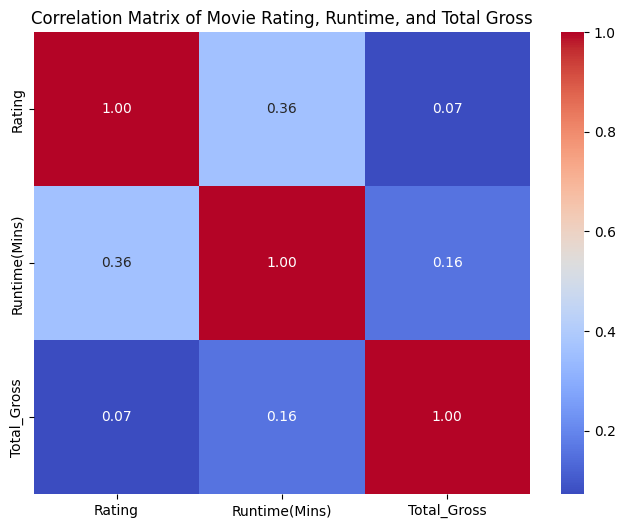

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Movie Rating, Runtime, and Total Gross")
plt.show()

In [17]:
print("Correlation Analysis:")
print("Rating and Runtime(Mins): The correlation coefficient is", correlation_matrix.loc['Rating', 'Runtime(Mins)'].round(2), ". This indicates a moderate positive correlation, suggesting that movies with longer runtimes tend to have slightly higher ratings.")
print("Rating and Total_Gross: The correlation coefficient is", correlation_matrix.loc['Rating', 'Total_Gross'].round(2), ". This indicates a weak positive correlation, suggesting a very slight tendency for movies with higher ratings to have higher total gross, but the relationship is not strong.")
print("Runtime(Mins) and Total_Gross: The correlation coefficient is", correlation_matrix.loc['Runtime(Mins)', 'Total_Gross'].round(2), ". This indicates a weak positive correlation, suggesting a slight tendency for movies with longer runtimes to have higher total gross, but the relationship is not strong.")

Correlation Analysis:
Rating and Runtime(Mins): The correlation coefficient is 0.36 . This indicates a moderate positive correlation, suggesting that movies with longer runtimes tend to have slightly higher ratings.
Rating and Total_Gross: The correlation coefficient is 0.07 . This indicates a weak positive correlation, suggesting a very slight tendency for movies with higher ratings to have higher total gross, but the relationship is not strong.
Runtime(Mins) and Total_Gross: The correlation coefficient is 0.16 . This indicates a weak positive correlation, suggesting a slight tendency for movies with longer runtimes to have higher total gross, but the relationship is not strong.


## Correlation Analysis
#### Correlation Analysis:
 - Rating and Runtime(Mins): The correlation coefficient is 0.36 . This indicates a moderate positive correlation, suggesting that movies with longer runtimes tend to have slightly higher ratings.


 - Rating and Total_Gross: The correlation coefficient is 0.07 . This indicates a weak positive correlation, suggesting a very slight tendency for movies with higher ratings to have higher total gross, but the relationship is not strong.


 - Runtime(Mins) and Total_Gross: The correlation coefficient is 0.16 . This indicates a weak positive correlation, suggesting a slight tendency for movies with longer runtimes to have higher total gross, but the relationship is not strong.


In [18]:
print("Summary of Observed Correlations:")
print(f"- Rating and Runtime(Mins): There is a moderate positive correlation (correlation coefficient = {correlation_matrix.loc['Rating', 'Runtime(Mins)']:.2f}). This suggests a tendency for longer movies to have higher ratings, although the relationship is not very strong.")
print(f"- Rating and Total_Gross: There is a very weak positive correlation (correlation coefficient = {correlation_matrix.loc['Rating', 'Total_Gross']:.2f}). This indicates a minimal relationship between a movie's rating and its total gross.")
print(f"- Runtime(Mins) and Total_Gross: There is a weak positive correlation (correlation coefficient = {correlation_matrix.loc['Runtime(Mins)', 'Total_Gross']:.2f}). This suggests a slight tendency for longer movies to have higher total gross, but the relationship is not strong.")

print("\nAnswering the user's question:")
print(f"Based on the correlation analysis, there is a moderate positive correlation ({correlation_matrix.loc['Rating', 'Runtime(Mins)']:.2f}) between 'Rating' and 'Runtime(Mins)'. This indicates that, on average, longer movies in this dataset tend to have slightly higher ratings compared to shorter movies. However, it's important to note that this is a correlation, not necessarily a causal relationship, and other factors also contribute to a movie's rating.")

Summary of Observed Correlations:
- Rating and Runtime(Mins): There is a moderate positive correlation (correlation coefficient = 0.36). This suggests a tendency for longer movies to have higher ratings, although the relationship is not very strong.
- Rating and Total_Gross: There is a very weak positive correlation (correlation coefficient = 0.07). This indicates a minimal relationship between a movie's rating and its total gross.
- Runtime(Mins) and Total_Gross: There is a weak positive correlation (correlation coefficient = 0.16). This suggests a slight tendency for longer movies to have higher total gross, but the relationship is not strong.

Answering the user's question:
Based on the correlation analysis, there is a moderate positive correlation (0.36) between 'Rating' and 'Runtime(Mins)'. This indicates that, on average, longer movies in this dataset tend to have slightly higher ratings compared to shorter movies. However, it's important to note that this is a correlation, not n

## Summary
#### Summary of Observed Correlations:
- Rating and Runtime(Mins): There is a moderate positive correlation (correlation coefficient = 0.36). This suggests a tendency for longer movies to have higher ratings, although the relationship is not very strong.
- Rating and Total_Gross: There is a very weak positive correlation (correlation coefficient = 0.07). This indicates a minimal relationship between a movie's rating and its total gross.
- Runtime(Mins) and Total_Gross: There is a weak positive correlation (correlation coefficient = 0.16). This suggests a slight tendency for longer movies to have higher total gross, but the relationship is not strong.

Answering the user's question:
Based on the correlation analysis, there is a moderate positive correlation (0.36) between 'Rating' and 'Runtime(Mins)'. This indicates that, on average, longer movies in this dataset tend to have slightly higher ratings compared to shorter movies. However, it's important to note that this is a correlation, not necessarily a causal relationship, and other factors also contribute to a movie's rating.

In [19]:
# Find the most common genres
most_common_genres = df['main_genre'].value_counts()
print("Most common genres:")
display(most_common_genres.head())

Most common genres:


,count
main_genre,
Action,1326
Comedy,1203
Drama,828
Crime,355
Biography,302


In [20]:
# Calculate the average rating for each genre
genre_avg_rating = df.groupby('main_genre')['Rating'].mean().sort_values(ascending=False)
print("\nAverage rating for each genre:")
display(genre_avg_rating)


Average rating for each genre:


,Rating
main_genre,
Western,8.125000
Film-Noir,7.633333
Mystery,7.294737
Biography,7.251325
Crime,7.117746
Drama,7.094324
Animation,6.991398
Adventure,6.714449
Action,6.528582


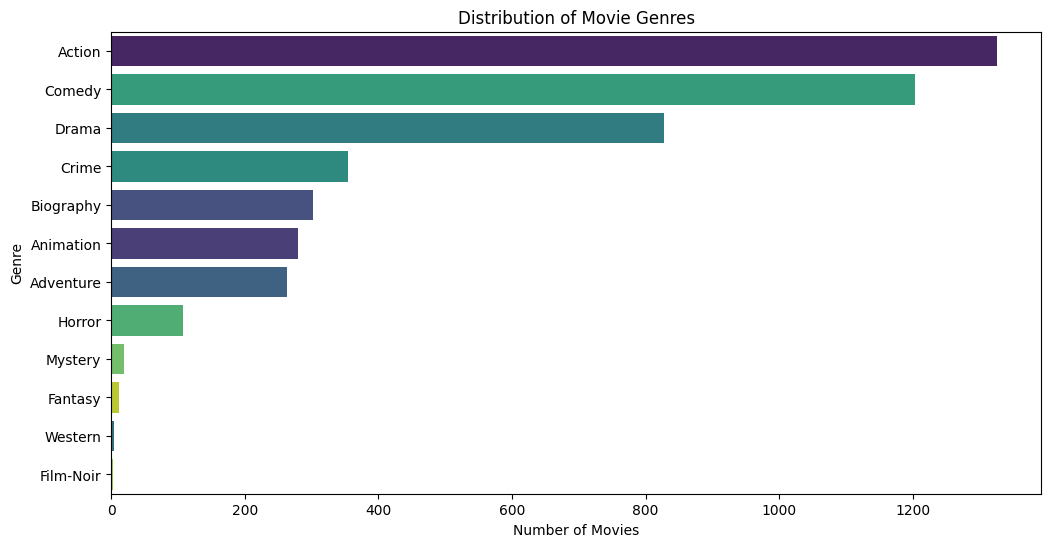

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='main_genre', order=df['main_genre'].value_counts().index, hue='main_genre', palette='viridis', legend=False)
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# Task
Analyze the relationship between genre and total gross, identify the top movies within each genre, and analyze the distribution of the 'Censor' variable.

## Relationship between genre and total gross

### Subtask:
Analyze how total gross varies across different main genres. This could involve calculating the average total gross per genre and visualizing it.


**Reasoning**:
Calculate and display the average total gross per genre and visualize it with a bar plot.



Average Total Gross per Genre:


,Total_Gross
main_genre,
Animation,110.308029
Action,76.873409
Adventure,59.640760
Fantasy,48.456364
Horror,45.160185
Comedy,41.899069
Mystery,35.974211
Biography,35.146556
Drama,31.020217


/tmp/ipython-input-4262643502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg_gross.values, y=genre_avg_gross.index, palette='viridis')


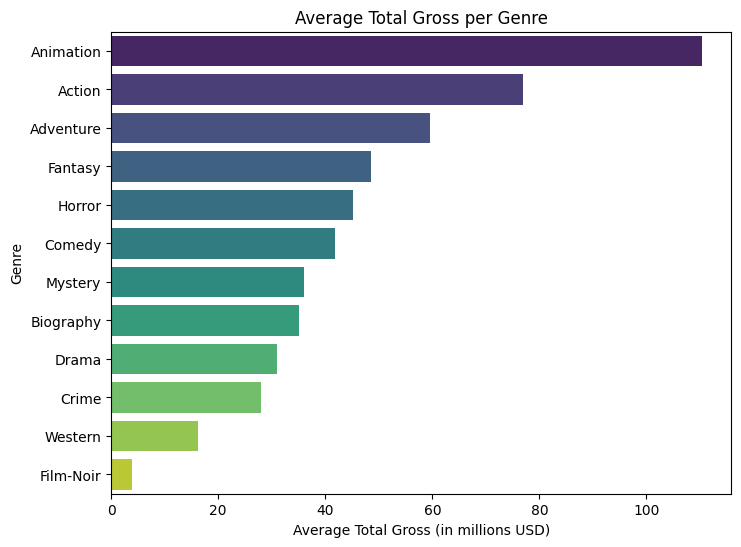

In [29]:
genre_avg_gross = df.groupby('main_genre')['Total_Gross'].mean().sort_values(ascending=False)
print("Average Total Gross per Genre:")
display(genre_avg_gross)

plt.figure(figsize=(8, 6))
sns.barplot(x=genre_avg_gross.values, y=genre_avg_gross.index, palette='viridis')
plt.title('Average Total Gross per Genre')
plt.xlabel('Average Total Gross (in millions USD)')
plt.ylabel('Genre')
plt.show()

## Top movies within each genre

### Subtask:
For each main genre, identify the movies with the highest ratings or total gross.


**Reasoning**:
The first step is to group the DataFrame by 'main_genre' and then select the top 3 movies based on 'Total_Gross' for each genre.



In [24]:
top_grossing_movies_per_genre = df.groupby('main_genre').apply(lambda x: x.nlargest(3, 'Total_Gross'))
print("Top 3 Grossing Movies per Genre:")
display(top_grossing_movies_per_genre)

Top 3 Grossing Movies per Genre:


/tmp/ipython-input-2878684733.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_grossing_movies_per_genre = df.groupby('main_genre').apply(lambda x: x.nlargest(3, 'Total_Gross'))


Movie_Title  Year  \
main_genre                                                            
Action     130     Star Wars: Episode VII - The Force Awakens  2015   
           19                               Avengers: Endgame  2019   
           31                         Spider-Man: No Way Home  2021   
Adventure  3004  Harry Potter and the Deathly Hallows: Part 2  2011   
           3914                               The Jungle Book  2016   
           5020                                       Aladdin  2019   
Animation  198                                  Incredibles 2  2018   
           2087                                 The Lion King  2019   
           2019                                  Finding Dory  2016   
Biography  1650                                The Blind Side  2009   
           1601                             Bohemian Rhapsody  2018   
           1720                                       Lincoln  2012   
Comedy     4904                                    Home Alone  1990   
           5216                              Meet the Fockers  2004   
           4901                                  The Hangover  2009   
Crime      2266                                         Joker  2019   
           2365                                Ocean's Eleven  2001   
           2631                                      Hannibal  2001   
Drama      3643                                       Titanic  1997   
           4103                     The Passion of the Christ  2004   
           3452                                  Forrest Gump  1994   
Fantasy    3093                                 Sleepy Hollow  1999   
           3155                                   Vanilla Sky  2001   
           3422                                  The Haunting  1999   
Film-Noir  3065                                    Spellbound  1945   
           3097                                     Suspicion  1941   
           3006                                 The Third Man  1949   
Horror     3033                                       Get Out  2017   
           3159                                            Us  2019   
           3232                       The Blair Witch Project  1999   
Mystery    3210                             The Da Vinci Code  2006   
           2996                                Shutter Island  2010   
           3158                             Presumed Innocent  1990   
Western    2199                        The Outlaw Josey Wales  1976   
           2190                    Per qualche dollaro in più  1965   
           2195                                     Rio Bravo  1959   

                                                 Director  \
main_genre                                                  
Action     130                                J.J. Abrams   
           19          Directors:Anthony Russo, Joe Russo   
           31                                   Jon Watts   
Adventure  3004                               David Yates   
           3914                               Jon Favreau   
           5020                               Guy Ritchie   
Animation  198                                  Brad Bird   
           2087                               Jon Favreau   
           2019   Directors:Andrew Stanton, Angus MacLane   
Biography  1650                          John Lee Hancock   
           1601                              Bryan Singer   
           1720                          Steven Spielberg   
Comedy     4904                            Chris Columbus   
           5216                                 Jay Roach   
           4901                             Todd Phillips   
Crime      2266                             Todd Phillips   
           2365                         Steven Soderbergh   
           2631                              Ridley Scott   
Drama      3643                             James Cameron   
           4103                                Mel Gibson   
         

**Reasoning**:
Now that we have the top grossing movies per genre, the next step is to find the top 3 movies based on 'Rating' for each main genre.



In [25]:
top_rated_movies_per_genre = df.groupby('main_genre').apply(lambda x: x.nlargest(3, 'Rating'))
print("\nTop 3 Rated Movies per Genre:")
display(top_rated_movies_per_genre)


Top 3 Rated Movies per Genre:


/tmp/ipython-input-2812635432.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_rated_movies_per_genre = df.groupby('main_genre').apply(lambda x: x.nlargest(3, 'Rating'))


Movie_Title  Year  \
main_genre                                                             
Action     1                                   The Dark Knight  2008   
           2     The Lord of the Rings: The Return of the King  2003   
           3                                         Inception  2010   
Adventure  2186                Il buono, il brutto, il cattivo  1966   
           3455                                   Interstellar  2014   
           4872                             Back to the Future  1985   
Animation  1929                  Sen to Chihiro no kamikakushi  2001   
           1930                                  The Lion King  1994   
           18                Spider-Man: Into the Spider-Verse  2018   
Biography  1550                               Schindler's List  1993   
           1552                                     Goodfellas  1990   
           1553                               The Intouchables  2011   
Comedy     3457                                La vita è bella  1997   
           3464                                   Modern Times  1936   
           3465                                    City Lights  1931   
Crime      2253                                  The Godfather  1972   
           2255                          The Godfather Part II  1974   
           2256                                   12 Angry Men  1957   
Drama      3448                       The Shawshank Redemption  1994   
           3451                                     Fight Club  1999   
           3452                                   Forrest Gump  1994   
Fantasy    3048                                      Dark City  1998   
           3093                                  Sleepy Hollow  1999   
           3155                                    Vanilla Sky  2001   
Film-Noir  3006                                  The Third Man  1949   
           3065                                     Spellbound  1945   
           3097                                      Suspicion  1941   
Horror     2988                                         Psycho  1960   
           2999                                      The Thing  1982   
           3033                                        Get Out  2017   
Mystery    2989                                    Rear Window  1954   
           2991                                        Memento  2000   
           2993                                        Vertigo  1958   
Western    2187                   Once Upon a Time in the West  1968   
           2190                     Per qualche dollaro in più  1965   
           2195                                      Rio Bravo  1959   

                                                          Director  \
main_genre                                                           
Action     1                                     Christopher Nolan   
           2                                         Peter Jackson   
           3                                     Christopher Nolan   
Adventure  2186                                       Sergio Leone   
           3455                                  Christopher Nolan   
           4872                                    Robert Zemeckis   
Animation  1929                                     Hayao Miyazaki   
           1930                Directors:Roger Allers, Rob Minkoff   
           18    Directors:Bob Persichetti, Peter Ramsey, Rodne...   
Biography  1550                                   Steven Spielberg   
           1552                                    Martin Scorsese   
           1553           Directors:Olivier Nakache, Éric Toledano   
Comedy     3457                                    Roberto Benigni   
           3464                                    Charles Chaplin   
           3465                                    Charles Chaplin   
Crime      2253                               Francis Ford Coppola   
           2255                               Francis 

In [26]:
censor_counts = df['Censor'].value_counts()

In [28]:
print("Distribution of Movie Censor Ratings:")
display(censor_counts)

Distribution of Movie Censor Ratings:


,count
Censor,
UA,1003
A,972
U,931
R,818
PG-13,380
Not Rated,303
PG,117
18,64
16,27


**Reasoning**:
Create a bar plot to visualize the distribution of censor ratings using the calculated counts, ensuring appropriate labels and title are added.



/tmp/ipython-input-4179188866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=censor_counts.index, y=censor_counts.values, palette='viridis')


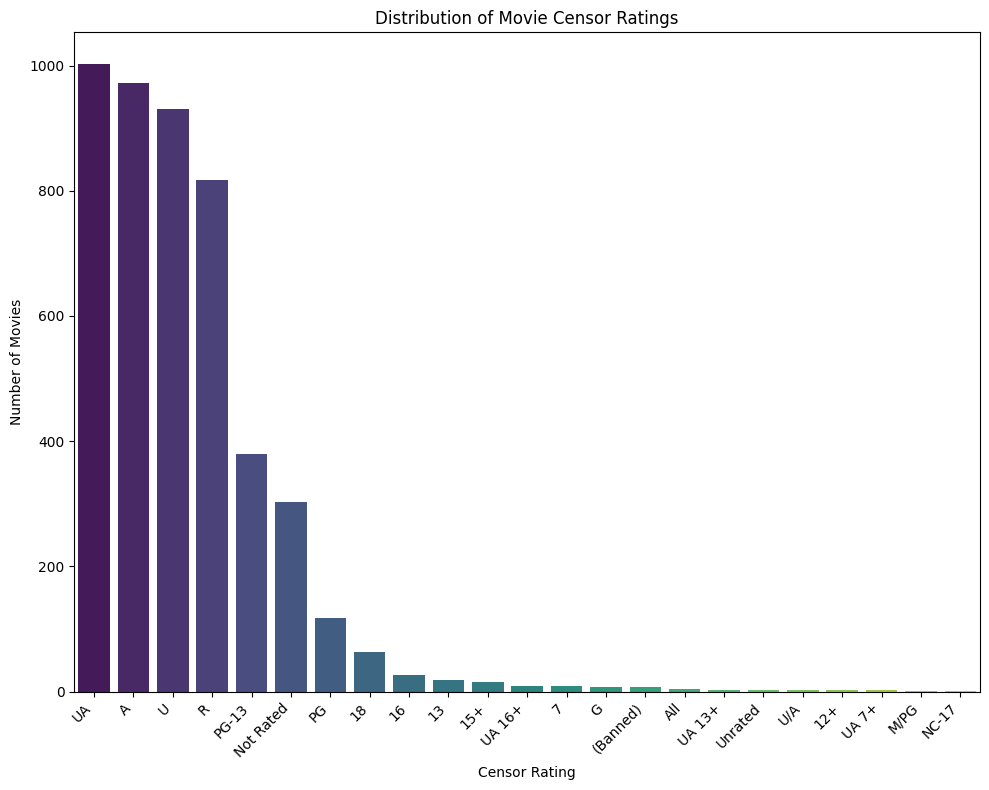

In [30]:
plt.figure(figsize=(10, 8))
sns.barplot(x=censor_counts.index, y=censor_counts.values, palette='viridis')
plt.title('Distribution of Movie Censor Ratings')
plt.xlabel('Censor Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
df.head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,534.86,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,377.85,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,292.58,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,342.55,Action,"Adventure, Drama"
5,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",8.8,178,U,315.54,Action,"Adventure, Drama"
